In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *
import geopandas as gpd
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins

from wordcloud import WordCloud,STOPWORDS
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Image save path
import os
save_path = "save/visualization/"
# Create save folder
if not os.path.exists(save_path):
    os.makedirs(save_path)
# Set sns themec
# plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

In [3]:
# Create a pandas dataframe of the Airbnb data
data = pd.read_csv('dataset/AB_NYC_2019.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

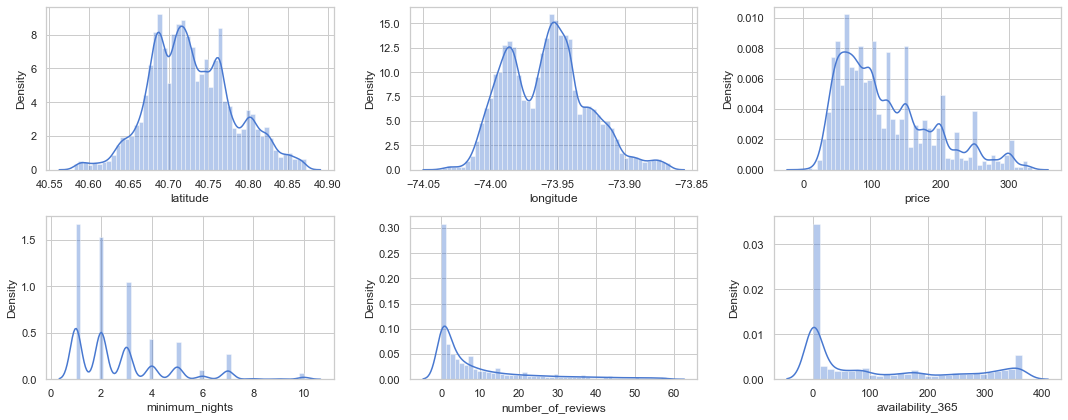

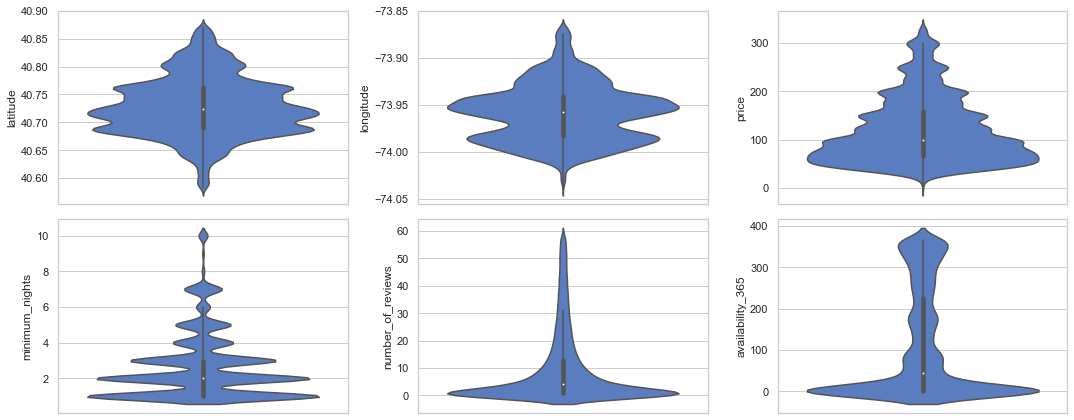

In [5]:
from code.visualization import numerical_plot
attributes = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']
numerical_plot(data,attributes,"distplot","plot_numerical_distribution_1.png")
numerical_plot(data,attributes,"violinplot","plot_numerical_distribution_2.png")

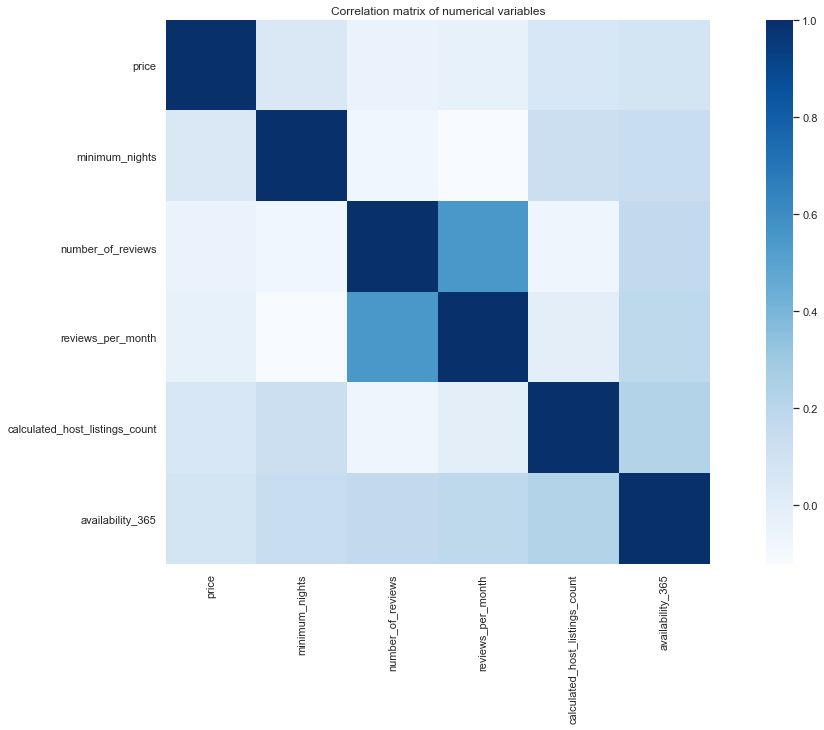

In [6]:
from code.visualization import cm_plot
drop_attributes = ['id', 'host_id', 'latitude', 'longitude']
cm_plot(data, drop_attributes, "plot_correlation_matrix.png")

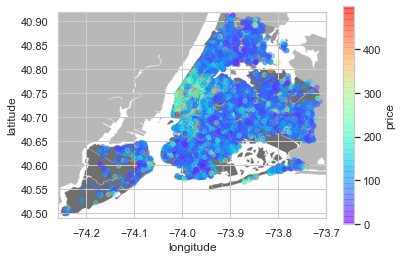

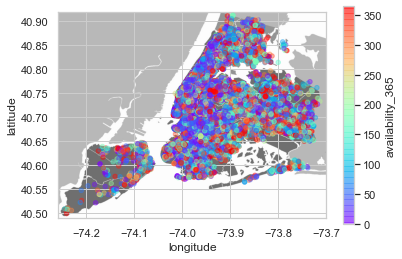

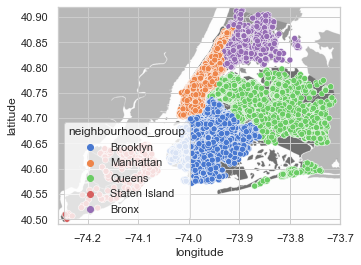

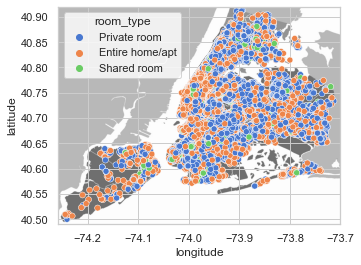

In [7]:
from code.visualization import geographical_distribution_colormap, geographical_distribution_scatterplot
geographical_distribution_colormap(data[data.price < 500], 'price', "dataset/New_York_City_.png.jpeg", "plot_heatmap_1.png")
geographical_distribution_colormap(data[data.price < 500], 'availability_365', "dataset/New_York_City_.png.jpeg", "plot_heatmap_2.png")
geographical_distribution_scatterplot(data, "neighbourhood_group", "dataset/New_York_City_.png.jpeg", "plot_scatterplot_1.png")
geographical_distribution_scatterplot(data, "room_type", "dataset/New_York_City_.png.jpeg", "plot_scatterplot_2.png")

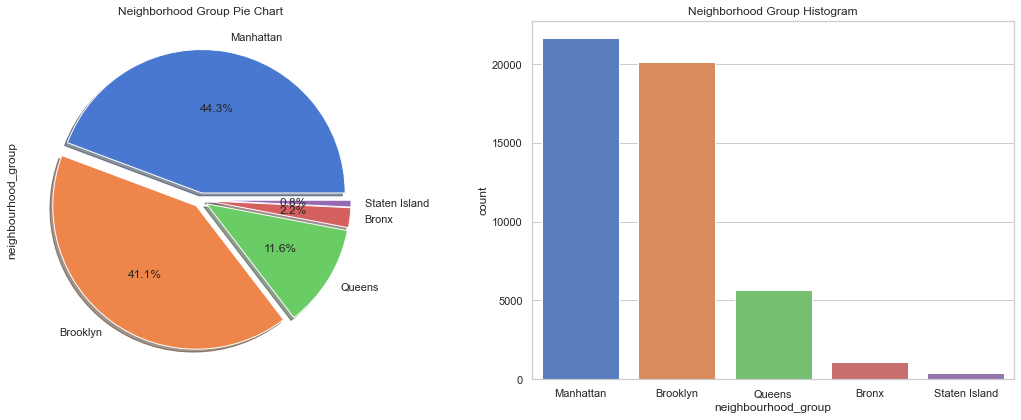

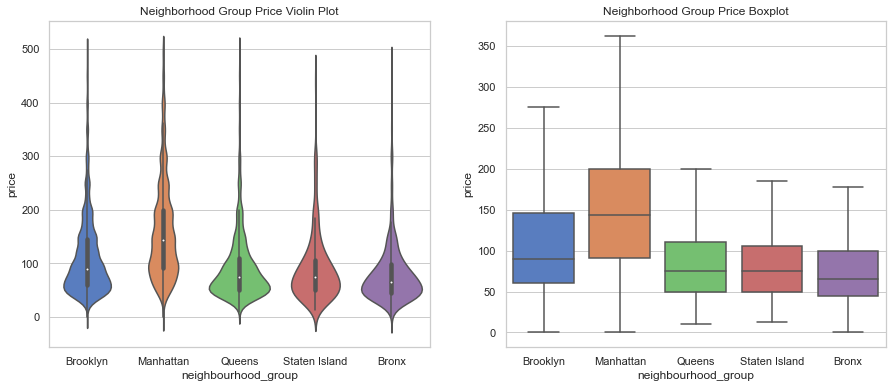

In [8]:
from code.visualization import neighbourhood_group_hosts_analysis, neighbourhood_group_price_analysis, comprehensive_analysis
neighbourhood_group_hosts_analysis(data, "plot_count_neighbourhood_group.png")
neighbourhood_group_price_analysis(data[data.price<500], "plot_price_neighberhood_group.png")
comprehensive_analysis(data, "plot_room_price_neighberhood_group.png")

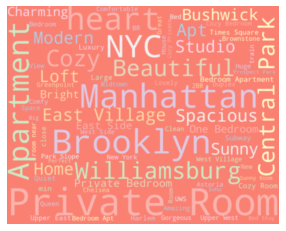

In [9]:
from code.visualization import make_wordcloud
make_wordcloud(data['name'].dropna())

In [1]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFE
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# import statsmodels.api as sm
from scipy import stats

In [2]:
from mp_clean_data import *

In [3]:
dataset, map_neigh_groups, map_neigh = cleanData('./data/AB_NYC_2019.csv')

/home/venkatesh/Academics/w21/ECE143/ECE143-Project/mp_clean_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adj'][data['name'].str.lower().str.contains(adj) == True] += 1
/home/venkatesh/Academics/w21/ECE143/ECE143-Project/mp_clean_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adj'][data['name'].str.lower().str.contains(adj) == True] += 1
/home/venkatesh/Academics/w21/ECE143/ECE143-Project/mp_clean_data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

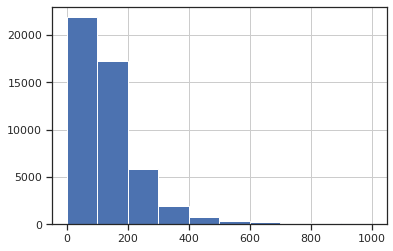

In [4]:
#Histogram of prices less than 1000

hist_price1=dataset["price"][dataset["price"]<1000].hist()

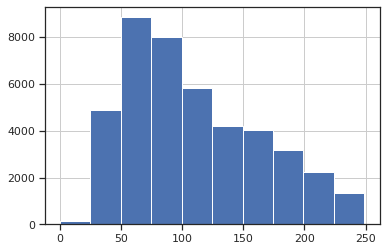

In [5]:
#Histogram of prices less than 250, looks gaussian

hist_price2=dataset["price"][dataset["price"]<250].hist()

Text(0.5, 1.0, 'Room Type vs Price')

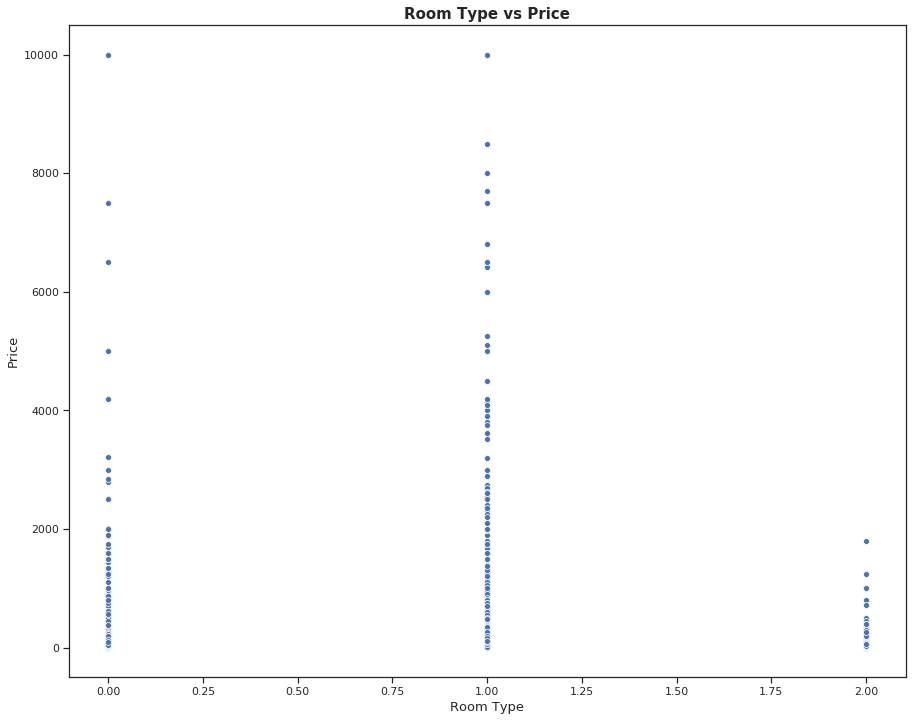

In [6]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=dataset)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

In [7]:
dataset.drop(['id','last_review'], axis=1, inplace=True)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'adj',
       'shared_in_name', 'airport_in_name', 'len_name'],
      dtype='object')

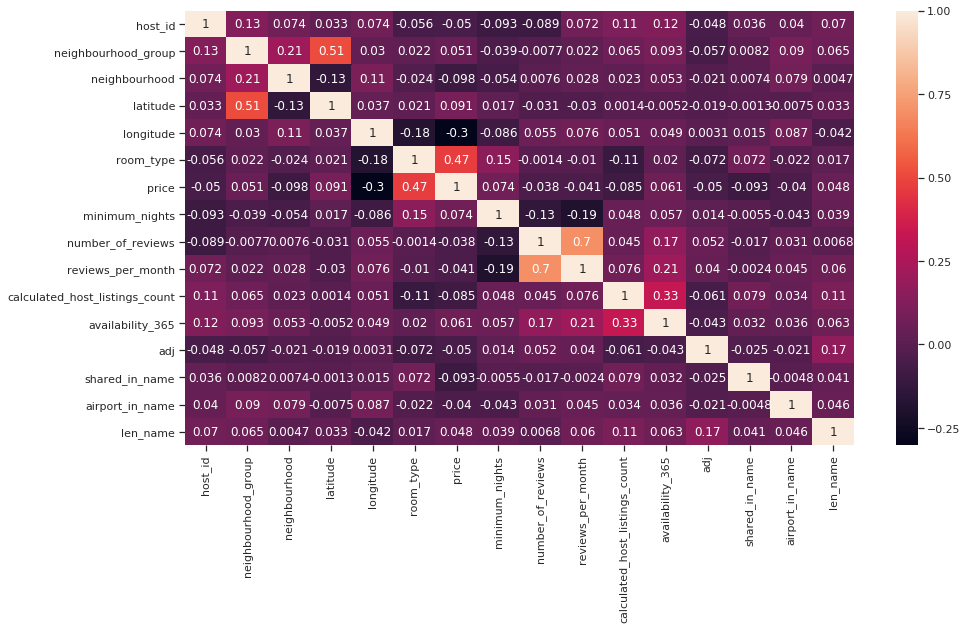

In [8]:
corr = dataset.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset.columns

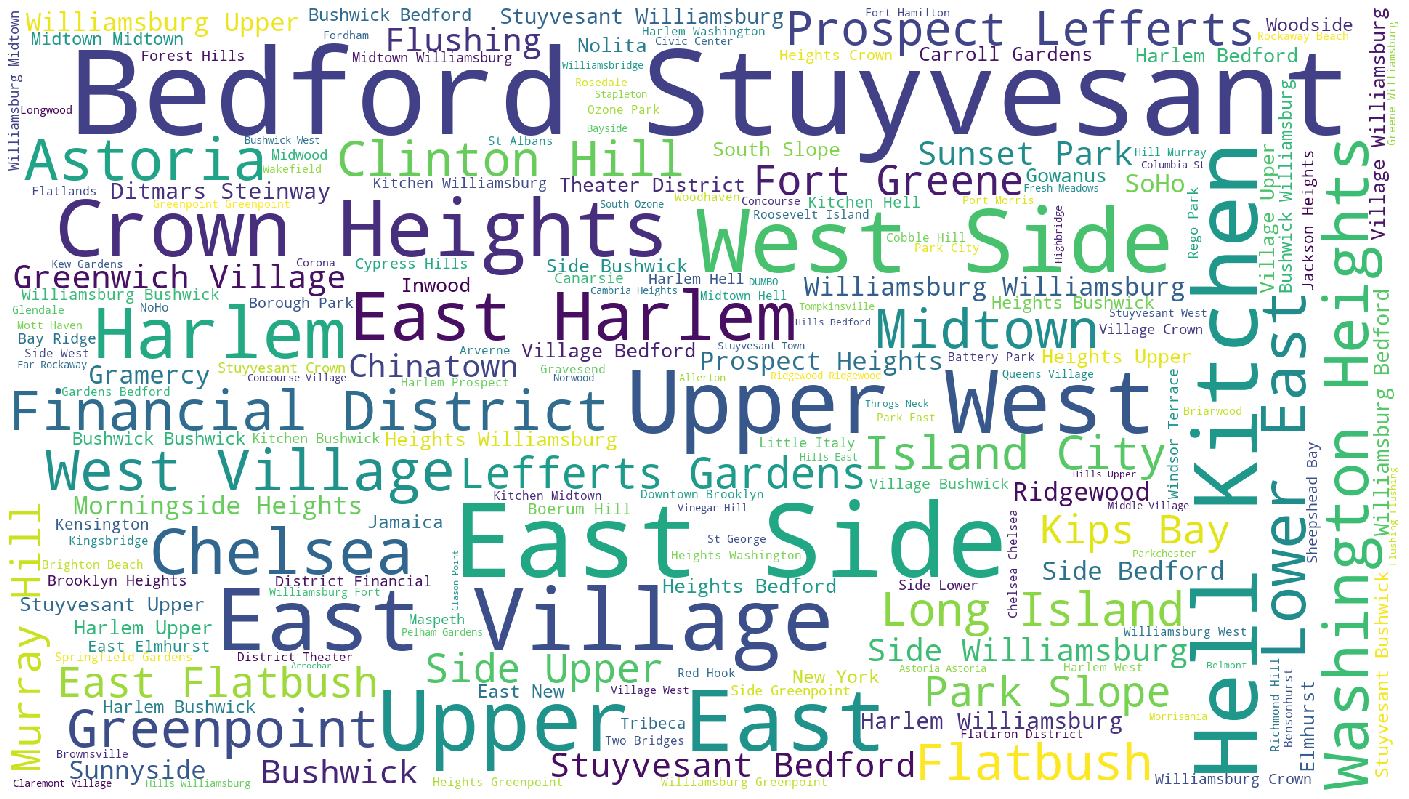

In [9]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))

wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dataset.neighbourhood.apply(lambda x: map_neigh.get(x))))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [10]:
useless_columns = ['host_id']
dataset.drop(useless_columns, axis=1, inplace=True)

In [11]:
all_columns = dataset.columns.to_numpy()
features = all_columns[all_columns != 'price']

In [12]:
x = dataset[features]
y = dataset['price']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=353)

In [14]:
#Linear Regression Model


folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 15))}]

lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)  

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

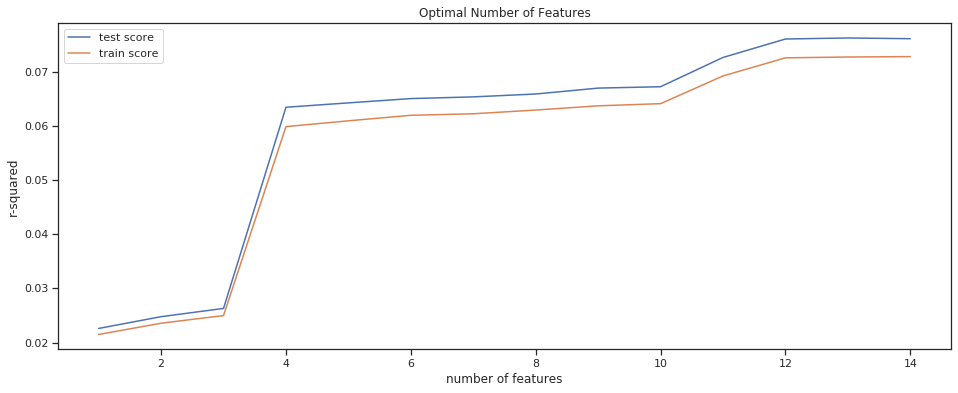

In [16]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')